# simulating choosing ends

In [1]:
import random

def process(number, iteration):
    i = 1
    # List of all ends of strings
    ends = [f"{j}a" for j in range(1, number+1)] + [f"{j}b" for j in range(1, number+1)]
    while i <= iteration:
        i += 1
        ends_excluding_loop = [item for item in ends if not item.startswith('0')]
        # Randomly choose two ends from the list
        chosen = random.sample(ends_excluding_loop, 2)

        # Note the strings that are chosen
        string_num1, string_num2 = int(chosen[0][:-1]), int(chosen[1][:-1])

        # If the two chosen ends are on the same string, remove both ends and put in a loop "L"
        if string_num1 == string_num2:
            l = f"0L"
            ends.remove(chosen[0])
            ends.remove(chosen[1])
            ends.append(l)
        # Create a new string if two ends are on different strings
        else:
            new_string_num = max(string_num1, string_num2) + 1 
            while new_string_num in [int(item[:-1]) for item in ends if item[:-1] and item[:-1].isdigit()]:
                new_string_num += 1
            new_string = [f"{new_string_num}a", f"{new_string_num}b"]  # New variable with both 'a' and 'b'
            ends = [item for item in ends if int(item[:-1]) not in [string_num1, string_num2]]
            ends.extend(new_string)  # Add the new string back to the list
    return ends

# Number of starting strings
n = 3
# Number of iterations
i = 3
ends = process(n, i)
print("Number of starting strings: ", n)
print("Number of iterations: ", i)
print("Number of loops formed: ", ends.count("0L"))
print("Number of strings left: ", len(set(int(item[:-1]) for item in ends if item[:-1] and item[:-1] != "0")))

Number of starting strings:  3
Number of iterations:  3
Number of loops formed:  1
Number of strings left:  0


# simulating a lot of times to generate graphs

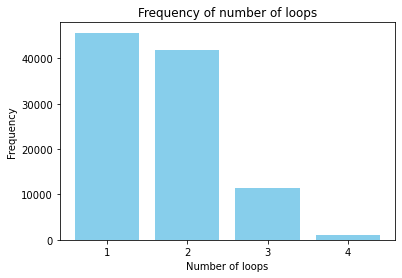

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

#starting number of strings
n = 4
#number of iterations
i =4
#number of simulations
s = 100000
#list of loop count and string count
loops = []
strings = []
for _ in range(s):
    ends = process(n,i)
    loops.append(ends.count("0L"))
    
loops_counter = Counter(loops)
num_loops = list(loops_counter.keys())
loops_frq = list(loops_counter.values())
plt.bar(num_loops, loops_frq, color='skyblue')
plt.xlabel('Number of loops')
plt.ylabel('Frequency')
plt.title('Frequency of number of loops')
plt.xticks(num_loops)  # Set the x-axis ticks to be the numbers
plt.show()


In [3]:
print("mean :", sum(loops) / len(loops))

mean : 1.67771


In [4]:
#sum that I derived
expectation = 0
for m in range(n-i+1,n+1):
    expectation += 1/(2*m-1)
print(expectation)

1.676190476190476


# Consider length

In [5]:
import random

def lenprocess(number, iteration):
    i = 1
    # List of all ends of strings
    ends = [f"{j}a1" for j in range(1, number+1)] + [f"{j}b1" for j in range(1, number+1)]
    while i <= iteration:
        i += 1
        # Randomly choose two ends from the list
        ends_without_loops = [item for item in ends if not item.startswith('0')]

        chosen = random.sample(ends_without_loops, 2)

        # Note the strings that are chosen
        string_num1, string_num2 = int(chosen[0][:-2]), int(chosen[1][:-2])
        length_num1, length_num2 = int(chosen[0][-1:]), int(chosen[1][-1:])
        # If the two chosen ends are on the same string, remove both ends and put in a loop "0L"
        if string_num1 == string_num2:
            l = f"0L{length_num1}"
            ends.remove(chosen[0])
            ends.remove(chosen[1])
            ends.append(l)
        # Create a new string if two ends are on different strings
        else:
            new_string_num = max(string_num1, string_num2) + 1 
            while new_string_num in [int(item[:-2]) for item in ends if item[:-2]]:
                new_string_num += 1
            new_string = [f"{new_string_num}a{length_num1+length_num2}", f"{new_string_num}b{length_num1+length_num2}"]  # New variable with both 'a' and 'b'
            ends = [item for item in ends if int(item[:-2]) not in [string_num1, string_num2]]
            ends.extend(new_string)  # Add the new string back to the list
    return ends

# Number of starting strings
n = 9
# Number of iterations
i = 9
ends = lenprocess(n, i)
print("Number of starting strings: ", n)
print("Number of iterations: ", i)
print("Number of loops formed: ", len([item for item in ends if item[-2] == "L"]))
print("Number of strings left: ", len(set(int(item[:-2]) for item in ends if item[:-2] != "0")))
print("Length of loops: ", [int(item[-1:]) for item in ends if item[-2] == "L"])

Number of starting strings:  9
Number of iterations:  9
Number of loops formed:  2
Number of strings left:  0
Length of loops:  [5, 4]


In [6]:
[int(item[-1:]) for item in ends if item[-2] == "L"]


[5, 4]

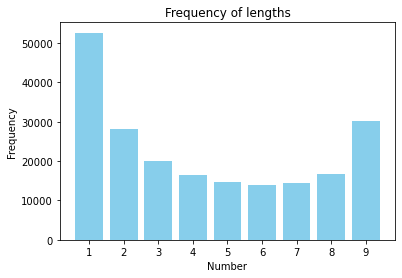

In [7]:
#starting number of strings
n = 9
#number of iterations
i = 9
#number of simulations
s = 100000
#list of loop count and string count
loops = []
lengths = []
for _ in range(s):
    ends = lenprocess(n,i)
    lengths.extend([int(item[-1:]) for item in ends if item[-2] == "L"])
lengths_counter = Counter(lengths)
num_lengths = list(lengths_counter.keys())
lengths_frq = list(lengths_counter.values())
plt.bar(num_lengths, lengths_frq, color='skyblue')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of lengths')
plt.xticks(num_lengths)  # Set the x-axis ticks to be the numbers
plt.show()

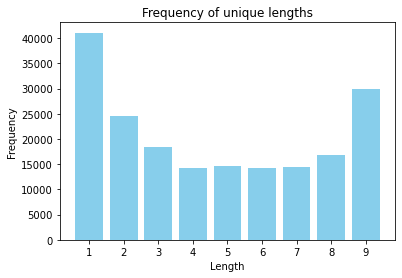

In [8]:
unique_lengths = []
for _ in range(s):
    ends = lenprocess(n,i)
    unique_lengths.extend(set([int(item[-1:]) for item in ends if item[-2] == "L"]))
unique_lengths_counter = Counter(unique_lengths)
num_unique_lengths = list(unique_lengths_counter.keys())
unique_lengths_frq = list(unique_lengths_counter.values())
plt.bar(num_unique_lengths, unique_lengths_frq, color='skyblue')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Frequency of unique lengths')
plt.xticks(num_unique_lengths)  # Set the x-axis ticks to be the numbers
plt.show()

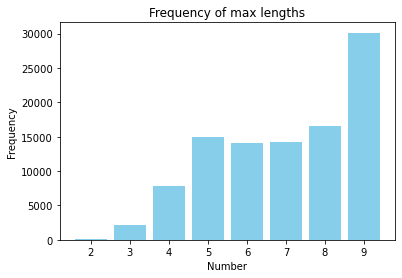

In [9]:
max_lengths = []
min_lengths = []
for _ in range(s):
    ends = lenprocess(n,i)
    max_lengths.append(max([int(item[-1:]) for item in ends if item[-2] == "L"]))
    min_lengths.append(min(int(item[-1:]) for item in ends if item[-2] == "L"))
max_lengths_counter = Counter(max_lengths)
num_max_lengths = list(max_lengths_counter.keys())
max_lengths_frq = list(max_lengths_counter.values())
plt.bar(num_max_lengths, max_lengths_frq, color='skyblue')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of max lengths')
plt.xticks(num_max_lengths)  # Set the x-axis ticks to be the numbers
plt.show()

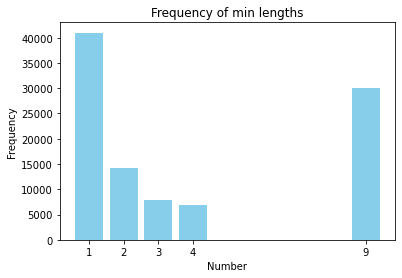

In [10]:
min_lengths_counter = Counter(min_lengths)
num_min_lengths = list(min_lengths_counter.keys())
min_lengths_frq = list(min_lengths_counter.values())
plt.bar(num_min_lengths, min_lengths_frq, color='skyblue')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of min lengths')
plt.xticks(num_min_lengths)  # Set the x-axis ticks to be the numbers
plt.show()